# Metrics, Read Explanation and function

In [548]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
import timeit
warnings.filterwarnings("ignore")

In [549]:
df = pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
# df = pd.read_csv('input/SDSS_final.csv')

In [550]:
df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,i,z,specobjid,plate,mjd,fiberid,redshift,class
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,15.50342,15.22531,3.720000e+18,3306,54922,491,-0.000009,STAR
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,16.48922,16.39150,3.640000e+17,323,51615,541,-0.000055,STAR
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,17.08732,16.80125,3.230000e+17,287,52023,513,0.123111,GALAXY
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,15.98233,15.90438,3.720000e+18,3306,54922,510,-0.000111,STAR
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,16.55492,16.61326,3.720000e+18,3306,54922,512,0.000590,STAR


In [551]:
df.columns

Index(['objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'u', 'g', 'r',
       'i', 'z', 'specobjid', 'plate', 'mjd', 'fiberid', 'redshift', 'class'],
      dtype='object')

In [552]:
from PIL import Image
import requests

def print_image(index):
    radeg, decdeg = df['ra'][index],df['dec'][index]
    scale = 0.015
    height, width = 512, 512

    str1 = 'http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image'
    str2 = '&ra={:f}&dec={:f}&scale=0.015&width=1024&height=1024&opt=&query='.format(radeg,decdeg)
    url = str1 + str2
    print(url)

    try:
        im = Image.open(requests.get(url, stream=True).raw)
    except:
        pass
        print("Error")
    
    return im


http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=184.350647&dec=0.207230&scale=0.015&width=1024&height=1024&opt=&query=
http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=183.531326&dec=0.089693&scale=0.015&width=1024&height=1024&opt=&query=
http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=184.380919&dec=0.174323&scale=0.015&width=1024&height=1024&opt=&query=


Text(0.5, 1.0, 'GALAXY')

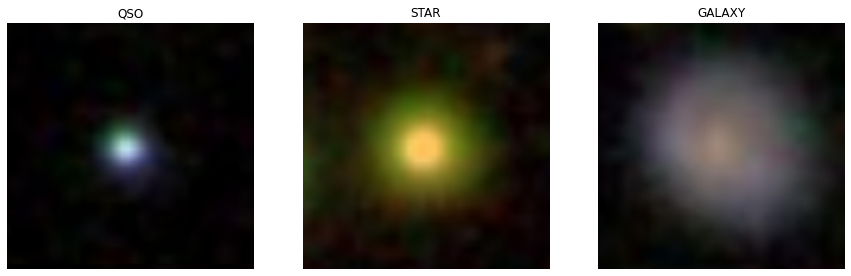

In [553]:
index = [15,0,19]
im1 = print_image(index[0])
im2 = print_image(index[1])
im3 = print_image(index[2])

fig = plt.figure(figsize=(15, 15))
  
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(im1)
plt.axis('off')
plt.title(df['class'][index[0]])

fig.add_subplot(rows, columns, 2)
plt.imshow(im2)
plt.axis('off')
plt.title(df['class'][index[1]])
  
fig.add_subplot(rows, columns, 3)
plt.imshow(im3)
plt.axis('off')
plt.title(df['class'][index[2]])

In [554]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [555]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

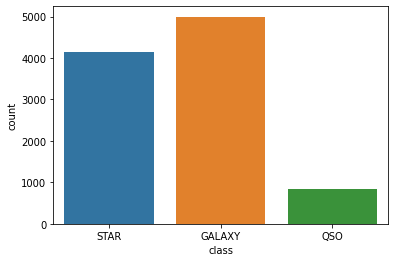

In [556]:
df['class'].head(10)
ax = sns.countplot(x='class',data=df)

In [557]:
#data['redshift'].describe()
data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
1,2,0.265919
0,1,0.349099


In [558]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
2,STAR,0.000043
1,QSO,1.218366
0,GALAXY,0.080325


## Distance Sparse

Redshift value shows the lookup on how early was the galaxy formed in universe. Edwin Hubble formulate the redshift into how shifted the wavelength of galaxy, thus indicating the radial velocity


\begin{align}
z = \frac{v}{c} = \frac{\lambda_{v}-\lambda_{0}}{\lambda_{0}}
\end{align}

Hubble's law could be stated in
\begin{align}
v = \frac{H_{0}}{d}
\end{align}



In [559]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['redshift'])
df['distance']= r.value

df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,z,specobjid,plate,mjd,fiberid,redshift,class,l,b,distance
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,15.22531,3.720000e+18,3306,54922,491,-0.000009,STAR,283.064461,61.513772,-0.038750
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,16.39150,3.640000e+17,323,51615,541,-0.000055,STAR,283.169750,61.577466,-0.237432
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,16.80125,3.230000e+17,287,52023,513,0.123111,GALAXY,283.339557,61.593309,517.978264
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,15.90438,3.720000e+18,3306,54922,510,-0.000111,STAR,283.769013,61.576636,-0.478399
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,16.61326,3.720000e+18,3306,54922,512,0.000590,STAR,283.762324,61.630713,2.552829


In [560]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,mjd,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,54922,491,-0.000009,STAR,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,51615,541,-0.000055,STAR,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,52023,513,0.123111,GALAXY,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,54922,510,-0.000111,STAR,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,54922,512,0.000590,STAR,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569


In [561]:
df['u-r'] = df['u']-df['r']

In [562]:
galaxy = df[df['class']=='GALAXY']
star = df[df['class']=='STAR']
quasar = df[df['class']=='QSO']

In [563]:
df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,491,-0.000009,STAR,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,541,-0.000055,STAR,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,513,0.123111,GALAXY,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766,1.90870
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,510,-0.000111,STAR,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,512,0.000590,STAR,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156


In [564]:
display(df.head())
display(df.columns)

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,491,-0.000009,STAR,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,541,-0.000055,STAR,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,513,0.123111,GALAXY,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766,1.90870
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,510,-0.000111,STAR,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,512,0.000590,STAR,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156


Index(['objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'u', 'g', 'r',
       'i', 'z', 'specobjid', 'plate', 'mjd', 'fiberid', 'redshift', 'class',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

In [565]:
df['class']=df['class'].map({'STAR':2,'GALAXY':1,'QSO':0}).astype(int)

In [566]:
df['class'].value_counts()

1    4998
2    4152
0     850
Name: class, dtype: int64

### We need to change the object class into numerical label

### 0s are galaxies, 2s are stars, and 1s are QSOs.

In [567]:
df.columns

Index(['objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'u', 'g', 'r',
       'i', 'z', 'specobjid', 'plate', 'mjd', 'fiberid', 'redshift', 'class',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

### I will not dropping RA and dec because a group of stars or galaxies could entangled in mutual gravitation, so they're located in a same area.

In [568]:
X_df = df.drop(['objid','ra','dec','run', 'rerun', 'camcol', 'field','specobjid', 'plate', 'mjd', 'fiberid','class','l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'], axis=1).values
y_df = df['class'].values

In [569]:
df

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,491,-0.000009,2,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,541,-0.000055,2,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,513,0.123111,1,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766,1.90870
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,510,-0.000111,2,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,512,0.000590,2,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,1345,301,3,161,18.81777,17.47053,16.91508,...,246,0.027583,1,167.160338,38.375884,118.577843,-48.692559,55.393567,92.850915,1.90269
9996,1.240000e+18,131.306083,51.671341,1345,301,3,162,18.27255,17.43849,17.07692,...,228,0.117772,1,166.993084,38.361225,496.126568,-203.096199,231.130062,389.194552,1.19563
9997,1.240000e+18,131.552562,51.666986,1345,301,3,162,18.75818,17.77784,17.51872,...,622,-0.000402,2,166.985906,38.514050,-1.736857,0.714549,-0.806160,-1.362424,1.23946
9998,1.240000e+18,131.477151,51.753068,1345,301,3,163,18.88287,17.91068,17.53152,...,229,0.014019,1,166.880177,38.461661,60.445266,-24.783240,28.034877,47.470694,1.35135


In [570]:
y_df

array([2, 2, 1, ..., 2, 1, 1])

### We use RA and dec first (note that some galaxies and stars grouping in same areas thanks to mutual gravitation)

## Neural Network Model

### We will try to use standard scaler first

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

$ z = (x - u) / s $

In [571]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#ss = StandardScaler()
#X_df = ss.fit_transform(X_df)
minmax = MinMaxScaler()
X_df = minmax.fit_transform(X_df)

In [572]:
y_df = y_df.reshape(-1,1)

In [573]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_df = enc.fit_transform(y_df).toarray()

In [574]:
y_df

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [575]:
df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,491,-0.000009,2,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,541,-0.000055,2,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,513,0.123111,1,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766,1.90870
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,510,-0.000111,2,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,512,0.000590,2,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156


In [576]:
y_df

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [577]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.25)
early_stop = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

In [578]:
X_train.shape

(7500, 6)

In [579]:
y_train.shape

(7500, 3)

In [580]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [581]:
model = Sequential()
model.add(Dense(64, input_dim=6, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [582]:
start_time_train = timeit.default_timer()
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=40, batch_size=32,callbacks=[early_stop])
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for NN: ' + str(upsampling_elapsed))

Epoch 1/40
211/211 [==============================] - 2s 7ms/step - loss: 0.9430 - accuracy: 0.4792 - val_loss: 0.8919 - val_accuracy: 0.5080
Epoch 2/40
211/211 [==============================] - 1s 5ms/step - loss: 0.9244 - accuracy: 0.4976 - val_loss: 0.8866 - val_accuracy: 0.5080
Epoch 3/40
211/211 [==============================] - 1s 6ms/step - loss: 0.9100 - accuracy: 0.4915 - val_loss: 0.8679 - val_accuracy: 0.5080
Epoch 4/40
211/211 [==============================] - 1s 6ms/step - loss: 0.8721 - accuracy: 0.4957 - val_loss: 0.7858 - val_accuracy: 0.5400
Epoch 5/40
211/211 [==============================] - 1s 5ms/step - loss: 0.7704 - accuracy: 0.5538 - val_loss: 0.7192 - val_accuracy: 0.6053
Epoch 6/40
211/211 [==============================] - 1s 5ms/step - loss: 0.7173 - accuracy: 0.5931 - val_loss: 0.7050 - val_accuracy: 0.5907
Epoch 7/40
211/211 [==============================] - 1s 5ms/step - loss: 0.6997 - accuracy: 0.5932 - val_loss: 0.6901 - val_accuracy: 0.5960
Epoch 

In [129]:
model.save_weights('model_final_test_run1.h5')

In [583]:
prediction = []
test = []

In [584]:
y_predict = model.predict(X_test)

In [585]:
for i in range(len(y_test)): 
    prediction.append(np.argmax(y_predict[i]))
    test.append(np.argmax(y_test[i])) 

In [586]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(prediction,test) 
print('Accuracy CNN is:', acc*100, '%')

Accuracy CNN is: 95.52000000000001 %


In [587]:
print(classification_report(test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       216
           1       0.97      0.94      0.96      1289
           2       0.93      0.99      0.96       995

    accuracy                           0.96      2500
   macro avg       0.96      0.94      0.95      2500
weighted avg       0.96      0.96      0.96      2500



In [588]:
confusion_matrix(test, prediction)

array([[ 190,   26,    0],
       [   5, 1212,   72],
       [   1,    8,  986]], dtype=int64)

# SVM

In [136]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [137]:
data=pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)
data=data.drop(['objid','rerun','specobjid','fiberid','ra','dec','camcol','plate', 'mjd',],axis=1)
X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [138]:
start_time_train = timeit.default_timer()
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

start_time_train = timeit.default_timer()
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for POLY: ' + str(upsampling_elapsed))

Training time for RBF: 1.7630772999999635
Training time for POLY: 1.6903180000000475


In [139]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [140]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  90.30
F1 (Polynomial Kernel):  90.29


In [141]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  91.60
F1 (RBF Kernel):  91.63


In [142]:
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       816
           1       0.88      0.93      0.91      1000
           2       0.98      0.93      0.96       184

    accuracy                           0.90      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.90      0.90      0.90      2000



In [143]:
confusion_matrix(y_test, poly_pred)

array([[704, 110,   2],
       [ 68, 931,   1],
       [  1,  12, 171]], dtype=int64)

In [144]:
print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       816
           1       0.95      0.89      0.92      1000
           2       0.99      0.91      0.95       184

    accuracy                           0.92      2000
   macro avg       0.94      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [145]:
confusion_matrix(y_test, rbf_pred)

array([[775,  41,   0],
       [109, 890,   1],
       [  8,   9, 167]], dtype=int64)

# Naive Bayes

In [151]:
data=pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [152]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [153]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

<AxesSubplot:>

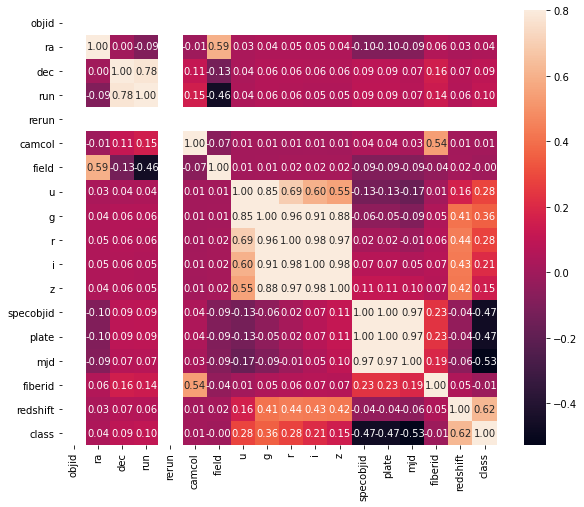

In [154]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [155]:
data=data.drop(['objid','rerun','specobjid','fiberid','ra','dec','camcol','plate', 'mjd',],axis=1)

In [156]:
#data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [158]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

start_time_train = timeit.default_timer()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for Naive Bayes: ' + str(upsampling_elapsed))

Training time for Naive Bayes: 0.003519299999879877


In [159]:
acc = accuracy_score(y_pred,y_test) 
print('Accuracy of Naive Bayes is:', round(acc*100,2), '%')

Accuracy of Naive Bayes is: 98.16 %


In [160]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2044
           1       0.98      0.99      0.98      2508
           2       0.94      0.90      0.92       448

    accuracy                           0.98      5000
   macro avg       0.97      0.96      0.97      5000
weighted avg       0.98      0.98      0.98      5000



In [161]:
confusion_matrix(y_test, y_pred)

array([[2030,    7,    9],
       [  14, 2475,   36],
       [   0,   26,  403]], dtype=int64)

# KNN

In [162]:
data=pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [163]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [164]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

<AxesSubplot:>

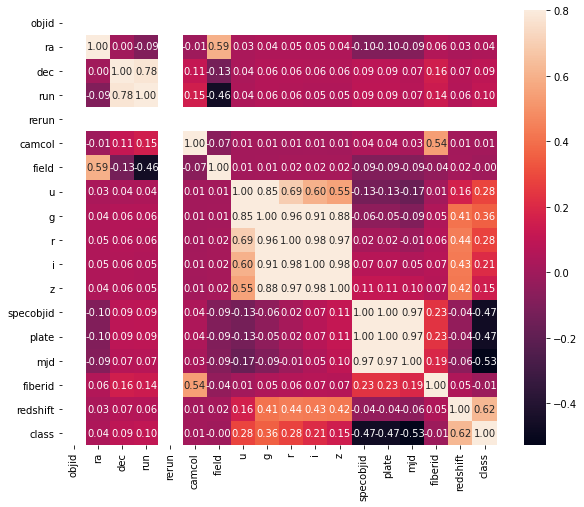

In [165]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [166]:
data=data.drop(['objid','rerun','specobjid','fiberid','ra','dec','camcol','plate', 'mjd',],axis=1)

In [167]:
data

,run,field,u,g,r,i,z,redshift,class
0,752,267,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,0
1,752,267,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,0
2,752,268,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,1
3,752,269,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,0
4,752,269,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,0
...,...,...,...,...,...,...,...,...,...
9995,1345,161,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583,1
9996,1345,162,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772,1
9997,1345,162,18.75818,17.77784,17.51872,17.43302,17.42048,-0.000402,0
9998,1345,163,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019,1


In [168]:
#data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)

In [169]:
y

0       0
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: class, Length: 10000, dtype: int32

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
start_time_train = timeit.default_timer()
neigh.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for KNN: ' + str(upsampling_elapsed))
KNeighborsClassifier()

Training time for KNN: 0.017752499999915017


KNeighborsClassifier()

In [172]:
ypred = neigh.predict(X_test)
Test_acc_random_forest = round(neigh.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  91.55


In [173]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       816
           1       0.93      0.90      0.91      1000
           2       0.99      0.97      0.98       184

    accuracy                           0.92      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.92      0.92      0.92      2000



In [174]:
confusion_matrix(y_test, ypred)

array([[757,  58,   1],
       [103, 896,   1],
       [  1,   5, 178]], dtype=int64)

# Random Forest

In [425]:
data=pd.read_csv('input/SDSS_final.csv')

In [426]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [427]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.240000e+18,209.439050,-0.293126,21.40675,20.88552,20.89071,20.91209,20.72144,752,301,3,440,4.550000e+18,2.399763,4037,55631,474,QSO
1,1.240000e+18,121.877577,45.077250,25.92152,22.26305,20.55681,19.71160,19.16875,1331,301,5,126,7.180000e+18,0.456324,6378,56330,717,GALAXY
2,1.240000e+18,124.756270,46.143024,22.10301,20.44919,18.64295,17.98695,17.58418,1331,301,3,140,4.970000e+17,0.354595,441,51868,115,GALAXY
3,1.240000e+18,183.849461,0.143010,22.85248,22.09973,20.28476,19.41890,19.06876,752,301,4,269,4.330000e+18,0.480464,3845,55323,17,GALAXY
4,1.240000e+18,189.810817,-2.207314,20.58849,20.14927,20.02577,20.14147,19.83024,1140,301,4,246,4.250000e+18,0.748259,3778,55213,110,QSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.240000e+18,151.201083,0.669279,18.81863,18.52837,18.08999,17.74230,17.65442,756,301,5,236,3.030000e+17,0.214063,269,51910,536,QSO
29996,1.240000e+18,188.829694,-1.649740,22.98777,21.13206,21.01412,21.17362,21.28052,1231,301,6,131,4.250000e+18,0.000145,3778,55213,695,STAR
29997,1.240000e+18,217.679029,-0.721670,24.81813,22.65607,21.01129,19.97748,19.63805,752,301,2,495,4.540000e+18,0.557969,4028,55621,3,GALAXY
29998,1.240000e+18,160.476541,-0.032671,22.54886,22.03707,20.39451,19.32129,18.54318,756,301,3,298,4.320000e+18,0.550828,3834,56014,459,GALAXY


In [428]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

<AxesSubplot:>

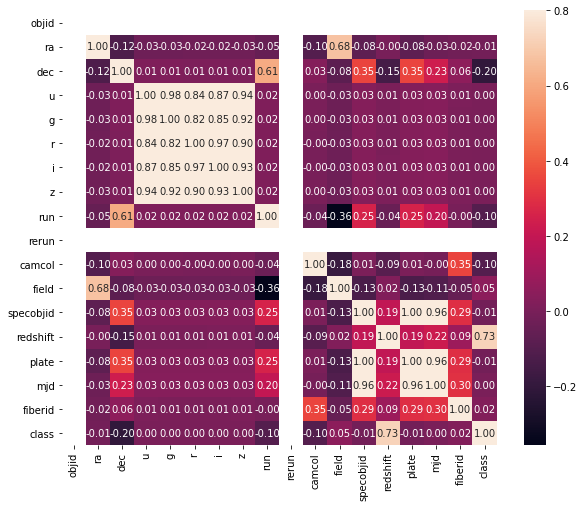

In [429]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [430]:
data=data.drop(['objid','rerun','specobjid','fiberid','ra','dec','camcol','plate', 'mjd','run','field'],axis=1)

In [431]:
data

,u,g,r,i,z,redshift,class
0,21.40675,20.88552,20.89071,20.91209,20.72144,2.399763,2
1,25.92152,22.26305,20.55681,19.71160,19.16875,0.456324,1
2,22.10301,20.44919,18.64295,17.98695,17.58418,0.354595,1
3,22.85248,22.09973,20.28476,19.41890,19.06876,0.480464,1
4,20.58849,20.14927,20.02577,20.14147,19.83024,0.748259,2
...,...,...,...,...,...,...,...
29995,18.81863,18.52837,18.08999,17.74230,17.65442,0.214063,2
29996,22.98777,21.13206,21.01412,21.17362,21.28052,0.000145,0
29997,24.81813,22.65607,21.01129,19.97748,19.63805,0.557969,1
29998,22.54886,22.03707,20.39451,19.32129,18.54318,0.550828,1


In [342]:
#data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)

In [343]:
y

0        2
1        1
2        1
3        1
4        2
        ..
29995    2
29996    0
29997    1
29998    1
29999    1
Name: class, Length: 30000, dtype: int32

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [345]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=200)

start_time_train = timeit.default_timer()
random_forest.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

Training time for RBF: 8.867020199999388


In [346]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  97.667


In [347]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2020
           1       0.96      0.98      0.97      2019
           2       0.98      0.95      0.97      1961

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



In [348]:
confusion_matrix(y_test, y_pred)

array([[2020,    0,    0],
       [  10, 1973,   36],
       [   3,   91, 1867]], dtype=int64)

In [349]:
import joblib
# save the model to disk
joblib.dump(random_forest, "./random_forest_test1.joblib")

['./random_forest_test1.joblib']


# Live Testing

0. https://skyserver.sdss.org/dr14/en/tools/crossid/crossid.aspx#help
1. Download panna udan Table name column ai remove seiya vendum
2. Piragu, z endra column ai redshift endru maatra vendum


In [589]:
from PIL import Image
import requests

def print_image(df,index):
    radeg, decdeg = df['ra'][index],df['dec'][index]
    scale = 0.015
    height, width = 512, 512

    str1 = 'http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image'
    str2 = '&ra={:f}&dec={:f}&scale=0.015&width=1024&height=1024&opt=&query='.format(radeg,decdeg)
    url = str1 + str2
    print(url)

    try:
        im = Image.open(requests.get(url, stream=True).raw)
    except:
        pass
        print("Error")
    
    return im


In [590]:
data=pd.read_csv('Test/new_sdss.csv')
data.head()

,objID,ra,dec,run,rerun,camcol,field,class,u,g,r,i,z,specObjID,plate,mjd,fiberID,redshift
0,1.240000e+18,15.502002,0.515352,4263,301,5,219,STAR,21.99938,19.73039,18.67928,18.26405,18.00196,1.690000e+18,1498,52914,388,0.000114
1,1.240000e+18,15.493380,0.513567,4263,301,5,219,GALAXY,23.46245,21.21311,19.44700,18.82201,18.37411,7.800000e+17,693,52254,503,0.373543
2,1.240000e+18,15.493380,0.513567,4263,301,5,219,GALAXY,23.46245,21.21311,19.44700,18.82201,18.37411,4.760000e+18,4225,55455,808,0.373478
3,1.240000e+18,15.503910,0.512176,4263,301,5,219,GALAXY,19.15817,18.05311,17.63875,17.40735,17.27723,4.460000e+17,396,51816,435,0.018285
4,1.240000e+18,15.491410,0.463359,4263,301,5,219,GALAXY,22.73320,20.98437,19.29221,18.63999,18.21168,7.800000e+17,693,52254,489,0.390870


In [591]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [592]:
data['class']=data['class'].map({'STAR':2,'GALAXY':1,'QSO':0}).astype(int)
objid = data['objID']

In [593]:
data.columns

Index(['objID', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'u', 'g', 'r',
       'i', 'z', 'specObjID', 'plate', 'mjd', 'fiberID', 'redshift', 'class'],
      dtype='object')

In [594]:
data=data.drop(['objID', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field','specObjID',
       'plate', 'mjd', 'fiberID'],axis=1)

In [595]:
data.head()

,u,g,r,i,z,redshift,class
0,21.99938,19.73039,18.67928,18.26405,18.00196,0.000114,2
1,23.46245,21.21311,19.44700,18.82201,18.37411,0.373543,1
2,23.46245,21.21311,19.44700,18.82201,18.37411,0.373478,1
3,19.15817,18.05311,17.63875,17.40735,17.27723,0.018285,1
4,22.73320,20.98437,19.29221,18.63999,18.21168,0.390870,1


In [596]:
X=data.drop(['class'],axis=1)
y=data['class'].values
X=StandardScaler().fit_transform(X)

In [597]:
y

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1])

In [598]:
prediction = []
test = []

In [599]:
y_predict = model.predict(X)

In [601]:
for i in range(len(y)): 
    prediction.append(np.argmax(y_predict[i]))
    test.append(y[i]) 

In [604]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(prediction,test) 
print('Accuracy CNN is:', acc*100,'%')

Accuracy CNN is: 58.139534883720934 %
